# Laptop Price Prediction


## Importing Libraries and Reading Data

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [163]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')
(1303, 12)


## Data Cleaning

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [165]:
# Missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [166]:
# Checking duplicated rows
df.duplicated().sum()

0

In [167]:
# removing 'Unnamed' column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [168]:
# Removing 'GB' from 'Ram' column and making it 'int' datatype
df['Ram'] = df['Ram'].astype(str).str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')

# Removing 'Kg' from 'Weight' column and making it 'float' datatype
df['Weight'] = df['Weight'].astype(str).str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis and Feature engineering

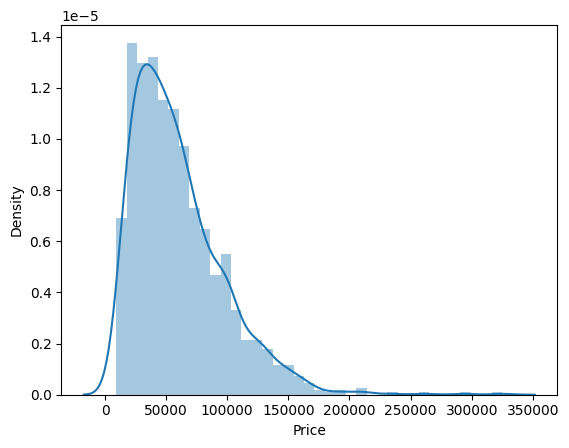

In [169]:
sns.distplot(df['Price'])
plt.show()

<Axes: >

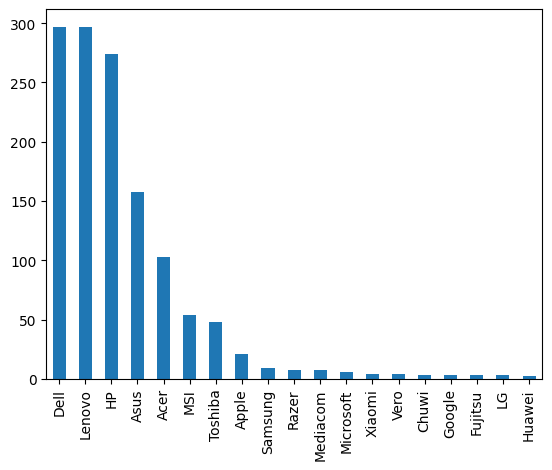

In [170]:
# Count every brand laptops
df['Company'].value_counts().plot(kind='bar')

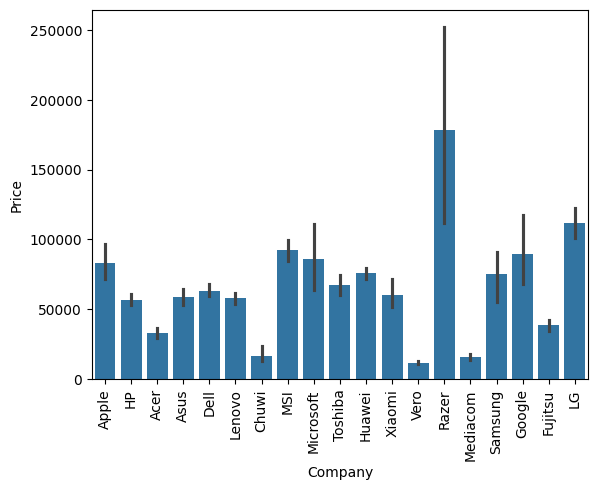

In [171]:
# Bar plot 
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

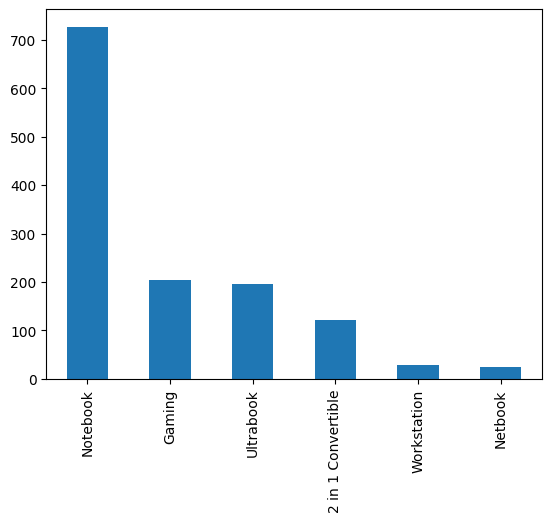

In [172]:
# different type of laptops
df['TypeName'].value_counts().plot(kind='bar')

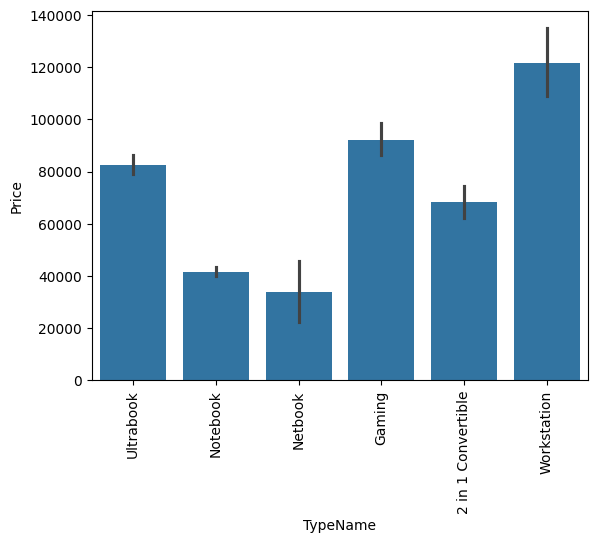

In [173]:
# Bar plot 
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

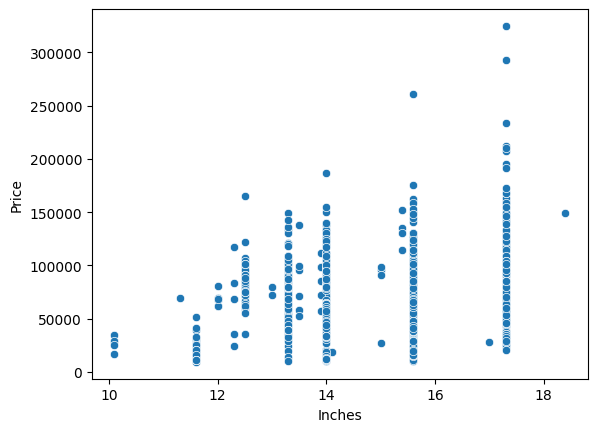

In [174]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [175]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [176]:
# Doing feature engineering to check whether a laptop is touch screen or not
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: >

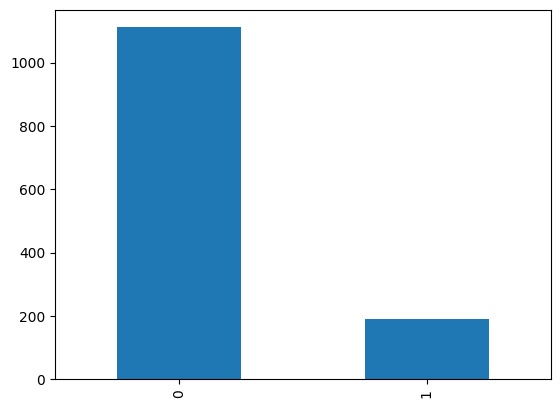

In [177]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

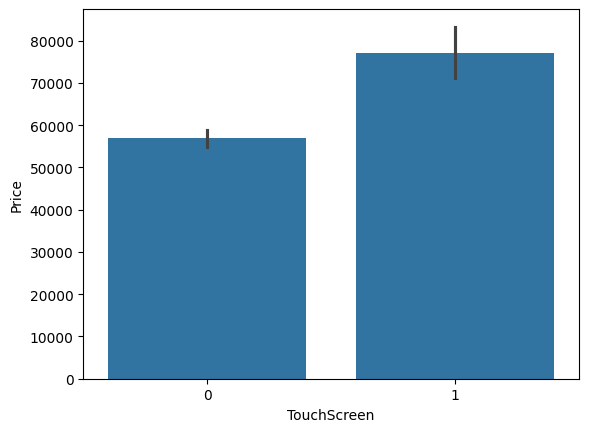

In [178]:
# How touchscreen affects the price
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [179]:
# Doing feature engineering to check whether a laptop has IPS panel
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS', ylabel='Price'>

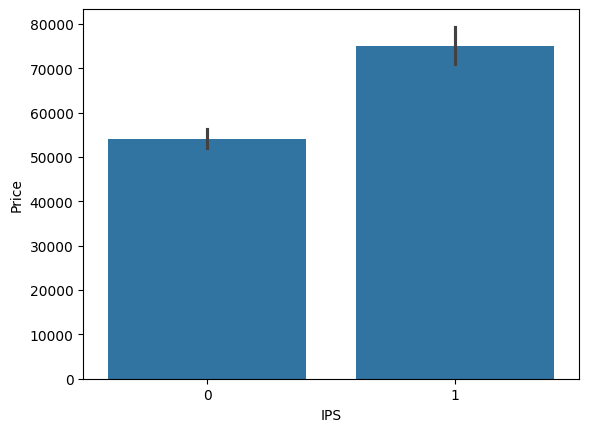

In [180]:
# How IPS panel affects the price
sns.barplot(x=df['IPS'],y=df['Price'])

In [181]:
# Finding x and y resolutions for finding ppi
# n -> at most no of splits
# expand-> true -> return df

temp = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = temp[0]
df['Y_res'] = temp[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [182]:
# Using regular expressions to find X_res value , d+ -> one or more digits
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [183]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [184]:
# Use correlation matrix 
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [185]:
# Finding ppi (pixel per inches)
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [186]:
# Dropping other columns and using ppi instead
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
ppi            0.473487
Name: Price, dtype: float64

In [187]:
# Now doing feature engineering on 'cpu'

df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [188]:
df['CPU Name'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))
df['CPU Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [189]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [190]:
df['CPU Processor'] = df['CPU Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Name,CPU Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

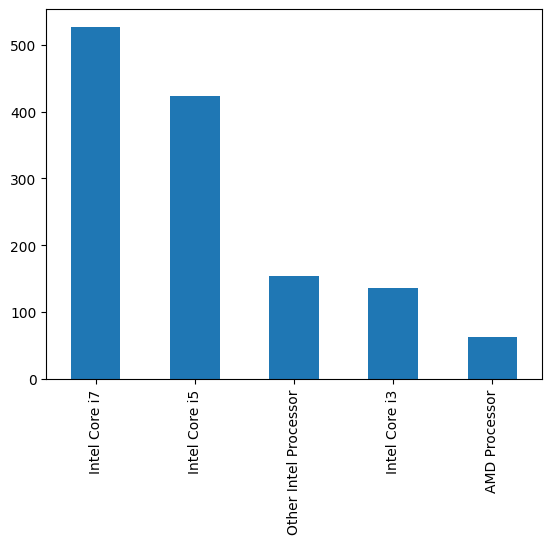

In [191]:
df['CPU Processor'].value_counts().plot(kind='bar')

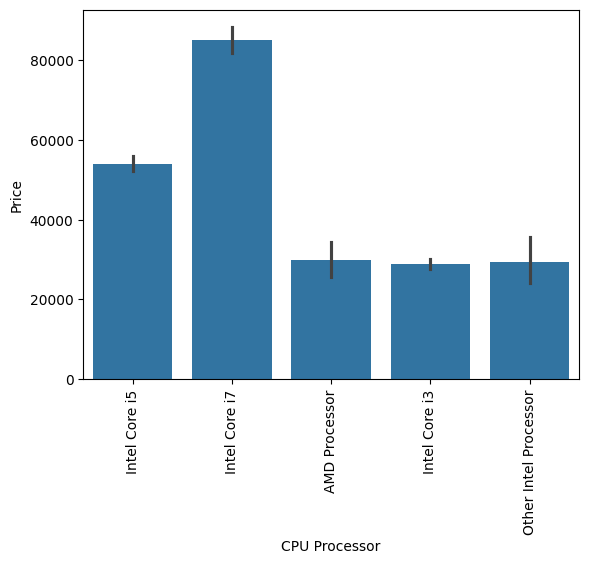

In [192]:
sns.barplot(x=df['CPU Processor'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [193]:
# DROPING cpu and cpu names columns
df.drop(columns=['Cpu','CPU Name'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   TouchScreen    1303 non-null   int64  
 9   IPS            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  CPU Processor  1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


<Axes: >

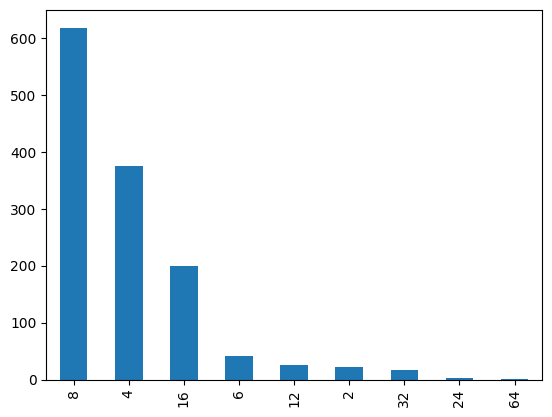

In [194]:
# EDA about the Ram
df['Ram'].value_counts().plot(kind='bar')

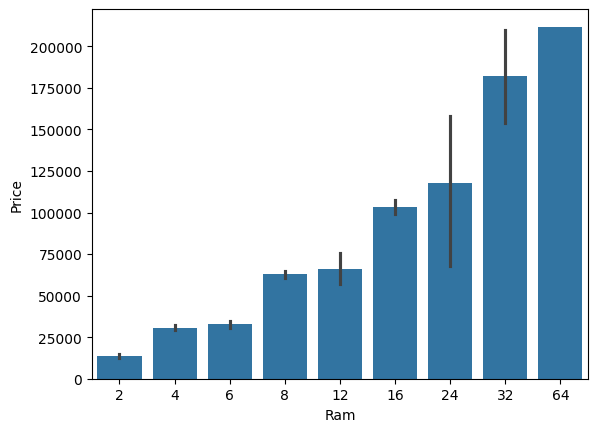

In [195]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

In [196]:
# Feature Engineering on Memory column
df['Memory'].value_counts()

# 4 columns will be made SSD,HDD,Flash storage,hybrid

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [197]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
# Replace leading and trailing whitespaces
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Replacing all Non-Numeric characters
df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [198]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [199]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [200]:
# Feature Engineering on 'Gpu'
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [201]:
df['GPU brand'] = df['Gpu'].apply(lambda x : x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage,GPU brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [202]:
df['GPU brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU brand, dtype: int64

In [203]:
df = df[df['GPU brand'] != 'ARM']
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage,GPU brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


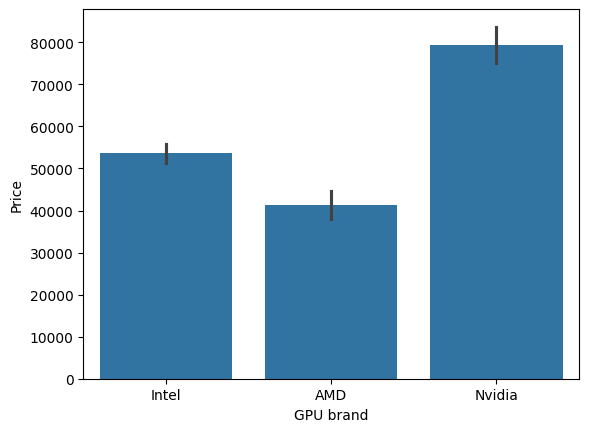

In [204]:
sns.barplot(x=df['GPU brand'],y=df['Price'])
plt.show()

In [205]:
df.drop(columns={'Gpu'},inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [206]:
# Feature engineering on Operating system
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

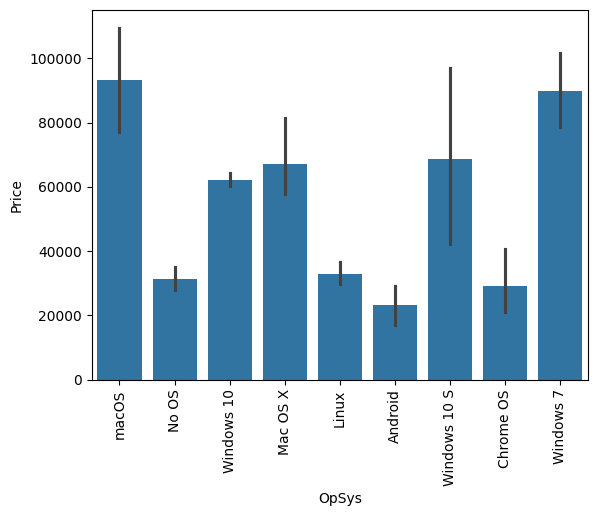

In [207]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [208]:

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

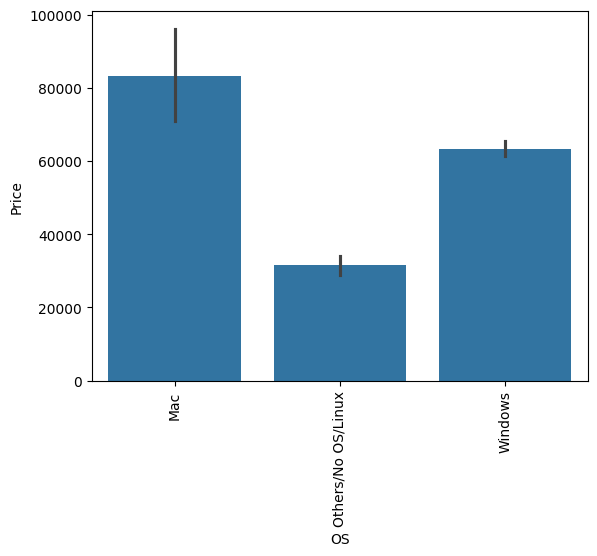

In [209]:

df['OS'] = df['OpSys'].apply(cat_os)
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [210]:
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,Hybrid,Flash_Storage,GPU brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


<Axes: xlabel='Weight', ylabel='Density'>

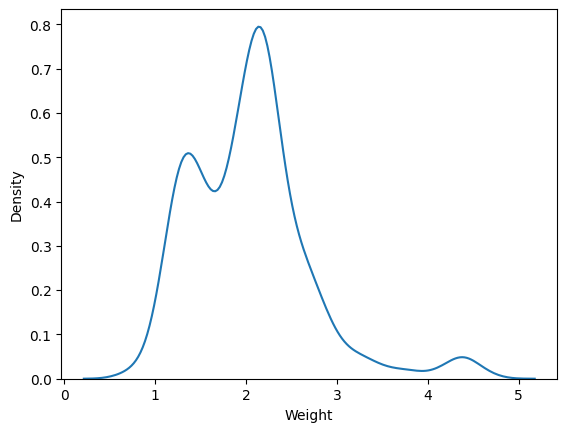

In [211]:
# EDA on weight
sns.kdeplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

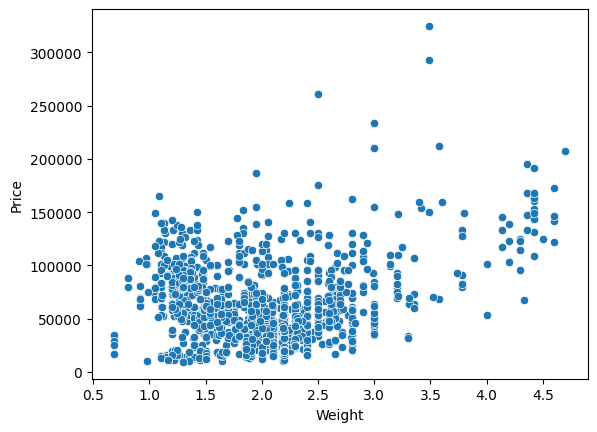

In [212]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [213]:
df.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPS              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [214]:
# Dropping Hybrid and Flash_storage column as they have very weak correlation with price
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   TouchScreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   ppi            1302 non-null   float64
 8   CPU Processor  1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SSD            1302 non-null   int64  
 11  GPU brand      1302 non-null   object 
 12  OS             1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [215]:
df.corr()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<Axes: >

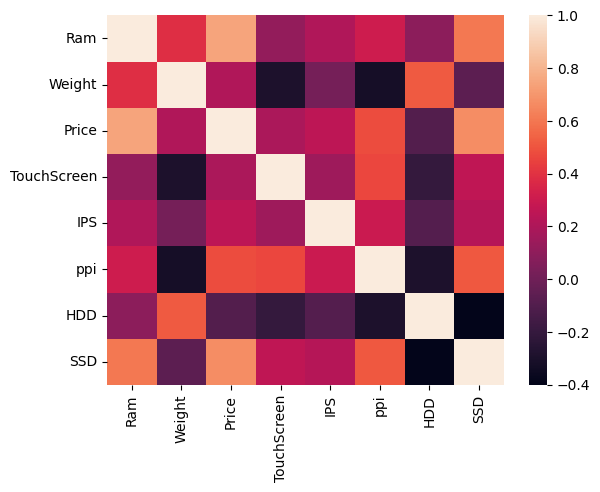

In [216]:
# Correlation Heat Map
sns.heatmap(df.corr())

<Axes: xlabel='Price', ylabel='Density'>

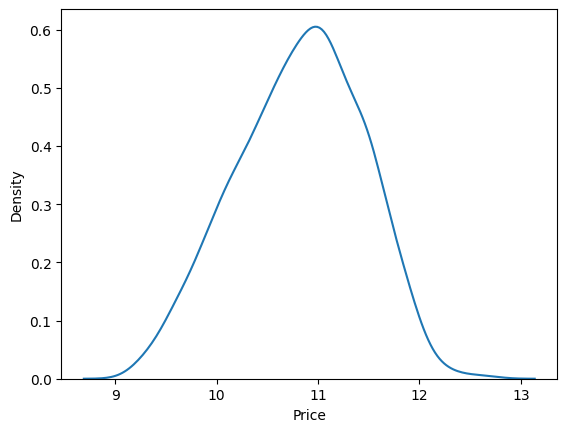

In [217]:
# As Price is skewed so performing logarithmic operation
sns.kdeplot(np.log(df['Price']))

## Model Selection

In [218]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [219]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [220]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [222]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [223]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Processor,HDD,SSD,GPU brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   TouchScreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   ppi            1302 non-null   float64
 8   CPU Processor  1302 non-null   object 
 9   HDD            1302 non-null   int64  
 10  SSD            1302 non-null   int64  
 11  GPU brand      1302 non-null   object 
 12  OS             1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


### Linear Regression

In [225]:
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe_linearReg = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_linearReg.fit(X_train, y_train)
y_pred_linear = pipe_linearReg.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

results_df = results_df.append({
    'Model': 'Linear Regression',
    'R2 Score': r2_linear,
    'MAE': mae_linear
}, ignore_index=True)

print('Linear Regression:')
print('R2 score:', r2_linear)
print('MAE:', mae_linear)

Linear Regression:
R2 score: 0.8073277448418656
MAE: 0.21017827976428838


### Lasso Regression

In [226]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_lassoReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_lassoReg.fit(X_train, y_train)
y_pred_lasso = pipe_lassoReg.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

results_df = results_df.append({
    'Model': 'Lasso Regression', 
    'R2 Score': r2_lasso, 
    'MAE': mae_lasso
}, ignore_index=True)

print('Lasso Regression:')
print('R2 score:', r2_lasso)
print('MAE:', mae_lasso)

Lasso Regression:
R2 score: 0.8071853945317105
MAE: 0.21114361613472565


### Ridge Regression

In [227]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_ridgeReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_ridgeReg.fit(X_train, y_train)
y_pred_ridge = pipe_ridgeReg.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

results_df = results_df.append({
    'Model': 'Ridge Regression', 
    'R2 Score': r2_ridge, 
    'MAE': mae_ridge
}, ignore_index=True)

print('Ridge Regression:')
print('R2 score:', r2_ridge)
print('MAE:', mae_ridge)

Ridge Regression:
R2 score: 0.8127331031311809
MAE: 0.20926802242582965


### KNN

In [228]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knnReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_knnReg.fit(X_train, y_train)
y_pred_knn = pipe_knnReg.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

results_df = results_df.append({
    'Model': 'KNN', 
    'R2 Score': r2_knn, 
    'MAE': mae_knn
}, ignore_index=True)

print('KNN:')
print('R2 score:', r2_knn)
print('MAE:', mae_knn)

KNN:
R2 score: 0.8027675291937718
MAE: 0.193456293739003


### Decision Tree

In [229]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe_dtReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_dtReg.fit(X_train, y_train)
y_pred_dt = pipe_dtReg.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

results_df = results_df.append({
    'Model': 'Decision Tree', 
    'R2 Score': r2_dt, 
    'MAE': mae_dt
}, ignore_index=True)

print('Decision Trees:')
print('R2 score:', r2_dt)
print('MAE:', mae_dt)

Decision Trees:
R2 score: 0.8433951260329667
MAE: 0.18307238670717613


### SVM

In [230]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe_svmReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_svmReg.fit(X_train, y_train)
y_pred_svm = pipe_svmReg.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

results_df = results_df.append({
    'Model': 'SVM', 
    'R2 Score': r2_svm, 
    'MAE': mae_svm
}, ignore_index=True)

print('SVM:')
print('R2 score:', r2_svm)
print('MAE:', mae_svm)

SVM:
R2 score: 0.8083180902288665
MAE: 0.2023905942724332


### Random Forest

In [231]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

pipe_rfReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_rfReg.fit(X_train, y_train)
y_pred_rf = pipe_rfReg.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

results_df = results_df.append({
    'Model': 'Random Forest', 
    'R2 Score': r2_rf, 
    'MAE': mae_rf
}, ignore_index=True)

print('Random Forest:')
print('R2 score:', r2_rf)
print('MAE:', mae_rf)

Random Forest:
R2 score: 0.8873402378382488
MAE: 0.15860130110457718


### Extra Trees

In [232]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15,bootstrap=True)

pipe_etReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_etReg.fit(X_train, y_train)
y_pred_et = pipe_etReg.predict(X_test)

r2_et = r2_score(y_test, y_pred_et)
mae_et = mean_absolute_error(y_test, y_pred_et)

results_df = results_df.append({
    'Model': 'Extra Trees', 
    'R2 Score': r2_et, 
    'MAE': mae_et
}, ignore_index=True)

print('Extra Trees:')
print('R2 score:', r2_et)
print('MAE:', mae_et)

Extra Trees:
R2 score: 0.8850720167552375
MAE: 0.16154538000217084


### AdaBoost

In [233]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe_abReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_abReg.fit(X_train, y_train)
y_pred_ab = pipe_abReg.predict(X_test)

r2_ab = r2_score(y_test, y_pred_ab)
mae_ab = mean_absolute_error(y_test, y_pred_ab)

results_df = results_df.append({
    'Model': 'AdaBoost', 
    'R2 Score': r2_ab, 
    'MAE': mae_ab
}, ignore_index=True)

print('AdaBoost:')
print('R2 score:', r2_ab)
print('MAE:', mae_ab)

AdaBoost:
R2 score: 0.7899278579687996
MAE: 0.23178308512630783


### Gradient Boost

In [234]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe_gbReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_gbReg.fit(X_train, y_train)
y_pred_gb = pipe_gbReg.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

results_df = results_df.append({
    'Model': 'Gradient Boosting', 
    'R2 Score': r2_gb, 
    'MAE': mae_gb
}, ignore_index=True)

print('Gradient Boosting:')
print('R2 score:', r2_gb)
print('MAE:', mae_gb)

Gradient Boosting:
R2 score: 0.8831401889349997
MAE: 0.1590513669504109


### XgBoost

In [235]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe_xgbReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_xgbReg.fit(X_train, y_train)
y_pred_xgb = pipe_xgbReg.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

results_df = results_df.append({
    'Model': 'XG Boost', 
    'R2 Score': r2_xgb, 
    'MAE': mae_xgb
}, ignore_index=True)

print('Gradient Boosting:')
print('R2 score:', r2_xgb)
print('MAE:', mae_xgb)

Gradient Boosting:
R2 score: 0.8771404806375557
MAE: 0.16262936288951352


### Voting Regressor

In [236]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=10, bootstrap=True)

step2 = VotingRegressor([
    ('rf', rf), 
    ('gbdt', gbdt), 
    ('et', et)
], weights=[5, 1, 1])

pipe_votingReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_votingReg.fit(X_train, y_train)
y_pred_voting = pipe_votingReg.predict(X_test)

r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)

results_df = results_df.append({
    'Model': 'Voting Regressor', 
    'R2 Score': r2_voting, 
    'MAE': mae_voting
}, ignore_index=True)

print('Voting Regressor:')
print('R2 score:', r2_voting)
print('MAE:', mae_voting)

Voting Regressor:
R2 score: 0.8899036890103664
MAE: 0.15858907480928766


### Stacking

In [237]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5,bootstrap=True))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe_stackingReg = Pipeline([
    ('step1', step1), 
    ('step2', step2)
])

pipe_stackingReg.fit(X_train, y_train)
y_pred_stacking = pipe_stackingReg.predict(X_test)

r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

results_df = results_df.append({
    'Model': 'Stacking Regressor', 
    'R2 Score': r2_stacking, 
    'MAE': mae_stacking
}, ignore_index=True)

print('Stacking Regressor:')
print('R2 score:', r2_stacking)
print('MAE:', mae_stacking)

Stacking Regressor:
R2 score: 0.8768438039204849
MAE: 0.1678534595864748


### Comparing the Models

In [238]:
print("Results DataFrame:")
results_df

Results DataFrame:


,Model,R2 Score,MAE
0,Linear Regression,0.807328,0.210178
1,Lasso Regression,0.807185,0.211144
2,Ridge Regression,0.812733,0.209268
3,KNN,0.802768,0.193456
4,Decision Tree,0.843395,0.183072
5,SVM,0.808318,0.202391
6,Random Forest,0.887340,0.158601
7,Extra Trees,0.885072,0.161545
8,AdaBoost,0.789928,0.231783
9,Gradient Boosting,0.883140,0.159051


In [239]:
# Identify the best model based on R2 Score
best_r2_model = results_df.loc[results_df['R2 Score'].idxmax()]
print("\nBest Model based on R2 Score:")
print(best_r2_model)

# Identify the best model based on MAE
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]
print("\nBest Model based on MAE:")
print(best_mae_model)


Best Model based on R2 Score:
Model       Voting Regressor
R2 Score            0.889904
MAE                 0.158589
Name: 11, dtype: object

Best Model based on MAE:
Model       Voting Regressor
R2 Score            0.889904
MAE                 0.158589
Name: 11, dtype: object


## Exporting the Model

In [241]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_votingReg,open('pipe.pkl','wb'))